# SLU06 - Dealing with Data Problems

In this notebook we will be covering the following:

- A (short) Introduction to Data Cleanup
- Data Entry Problems
 - Data entry problems in categorical variables
 - Data entry problems in numerical variables
 - Duplicated entries
- Missing Values
- Tidy Data


## 1.  A (short) Introduction to Data Cleanup

In a real world scenario, data is **almost never ready** for exploratory analysis, visualization, or modeling. The world is messy, and unfortunately, so is it's data. 

The appeal of being a data analyst or data scientist does not come from cleaning messy data. And yet, it’s the activity that often ends up consuming the majority of their time. On average, 80 percent of the time is spent ensure your data is in a clean and workable form, while just 20 percent is dedicated to visualizing and analyzing data, creating machine learning models, or other advanced analytics. The data cleaning is **always the first step** when building a machine learning model. 

>**No models create meaningful results with messy data.**


![dirty-data](https://cdn.techinasia.com/wp-content/uploads/2018/08/dirty-data.jpg)

### So what is Data Cleaning? 

The data cleaning can be defined as such:

>**Data cleaning or cleansing** is the process of **detecting and correcting (or removing) corrupt or inaccurate records** from a record set, table, or database. 
>Refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

We may consider a dataset as "messy" when it doesn’t adhere to the *required standards for analysis*. And many different things can contribute to it. 

For example, a messy dataset may contain a certain **standardization that needs to be corrected** — “Portugal” spelled as “Port.” when it should be “PT”. Or, phone numbers that contain dashes when there shouldn’t be any added punctuation, or that contain area codes in certain entries.  

Beyond standardization, there are many other types of errors that may need to be cleaned in dirty data. These errors can include: 

- missing data
- unstructured data
- multiple variables in one column
- variables stored in the wrong places
- observations split incorrectly or left together against normalization rules
- switched columns and rows
- extra spaces 
- and many, many more...
 

We’ve all heard the expression “*garbage in, garbage out*” but it’s important to remember what that really means: 
> **Fail to adequately clean messy data, and no matter what fancy analytic techniques are applied next, the end analysis will be faulty.** 

Roll up your sleeves, cause things are about to get *messy*...

In [1]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

---

## 2. Data entry problems

As we've seen above, many different errors can contribute to the messiness of your data. **To error is not only human, but also expected.** 

![Monkey_data](https://thumbs.gfycat.com/BleakHarmfulCopperbutterfly-size_restricted.gif)

Typical data entry problems are:
- Case mismatches in text fields
- Grammar errors (_typos_) in text fields
- Wrong data types
- Non-sense values (AKA *“I really don’t know what to write here but this form forces me to write something...”*)
- Missing values
- Duplicated observations
- etc

The following DataFrame, located at `data/data_with_problems.csv`, illustrates what some of those problems look like.

In [2]:
data = pd.read_csv(os.path.join('data', 'data_with_problems.csv'), index_col=0)
print(f"This dataset has {len(data)} observations.")
print("Here are the top 10:")
data.head(10)

This dataset has 200 observations.
Here are the top 10:


,age,height,gender
CFLOXRHMDR,88.0,163.0,female
FXLJSNLSOG,29.0,158.0,female
FWDIVJKGOI,42.0,159.0,female
YWEBKQWHRE,25.0,179.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
SSZQEGTLNK,NaN,162.0,male
PRFEFXNGWN,36.0,166.0,female


In this DataFrame, we have:

* 3 variables: **age**, **height** and **gender**
    * The first two are **numerical** variables while the last one is **categorical**.
* 200 observations

Based on the names of our variables, we can assume that each row (observation) represents a person.

### 2.1 Data entry problems in categorical variables

Let's take a look at our categorical feature `gender`, using two functions: [nunique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html) and [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html).

#### nunique()
With `nunique` method we can get the number of unique values found in this `pd.Series`.

In [3]:
data['gender'].nunique()

7

> 7? That's an odd number...

#### value_counts()
Using `value_counts` method, we can get counts per unique value.

In [4]:
data['gender'].value_counts()

female       109
male          66
MALE           9
m              3
F              2
f              1
   female      1
Name: gender, dtype: int64

> Ok... Most of the observations have gender either with *female* or *male* values, but there are some cases where we have different values: MALE, m, F, f, female (*with leading blank spaces!!*).

By default, `value_counts` doesn't take into consideration missing data. We can change this by passing the `dropna` attribute as `False`. 

In [5]:
data['gender'].value_counts(dropna=False)

female       109
male          66
NaN            9
MALE           9
m              3
F              2
f              1
   female      1
Name: gender, dtype: int64

#### String Manipulation

To clean this data, we can do **string manipulation** directly on the DataFrame! (*much magic! such wow!*)
We can apply a **python string method** to all the elements in a pandas Series by calling `.str` on the Series, followed by the method.

##### str.lower() and str.upper()

Let's convert all the strings in the `gender` column to lower case, using [`str.lower`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

In [6]:
data['gender'] = data['gender'].str.lower()
data['gender'].value_counts()

female       109
male          75
m              3
f              3
   female      1
Name: gender, dtype: int64

As we can see, this converted all the cases of `MALE` (which were 9) to `male` (before: 66 observations, after: 75 observations). Also, all the cases of `F` (which were 2), were converted to `f` (before: 1 observation, after: 3 observations).

[`str.upper`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.upper.html) does exactly the opposite: converts the strings to uppercase.

In [7]:
data['gender'].str.upper().value_counts()

FEMALE       109
MALE          75
F              3
M              3
   FEMALE      1
Name: gender, dtype: int64

##### str.strip()

Another useful method is the [`str.strip`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.strip.html). It removes leading and trailing whitespaces from the strings. 

Let's try it out on the `gender` variable:

In [8]:
data['gender'] = data['gender'].str.strip()
data['gender'].value_counts()

female    110
male       75
m           3
f           3
Name: gender, dtype: int64

The string `female` with leading whitespaces was converted to `female`, without the whitespaces! yey! 

##### str.replace()

Next we need to replace `m` with `male` and `f` with `female`.

We can do that using the [`str.replace`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.replace.html) method, that receives as arguments a **pattern** and a **replacement** string.

In [9]:
# Note that here we're not changing the values in data.gender, we're just outputting them!
data['gender'].str.replace('m', 'male').value_counts()

femaleale    110
maleale       75
f              3
male           3
Name: gender, dtype: int64

> Wait... something is weird!

`str.replace()` replaces **any** occurrences of the pattern in the Series values, even if they appear in the middle of something!
We can fix this in two ways.

- **First option**: the pattern received by str.replace can be a **[regex](https://www.debuggex.com/cheatsheet/regex/python)**. 
    
Using a regex, we can specify that we want to replace the string `m` with `male`, but only when it appears alone.

In [10]:
data['gender'].str.replace('^m$', 'male').value_counts()

female    110
male       78
f           3
Name: gender, dtype: int64

And we can chain two of these operations together in order to handle the two replacements at the same time.
Notice that we need to call `.str` again.

In [11]:
data['gender'].str.replace('^m$', 'male').str.replace('^f$', 'female').value_counts()

female    113
male       78
Name: gender, dtype: int64

- **Second option**: instead of using the `str.replace` method, we can use pandas' `replace()` method, that receives as argument a **dictionary** with the full-word replacements we want to do.

In [12]:
data['gender'] = data['gender'].replace({'m': 'male', 'f': 'female'}) # this time the changes are being saved!
data['gender'].value_counts()

female    113
male       78
Name: gender, dtype: int64

> Looking good!

##### str.split() and str.cat()

We've seen how to use some string methods directly on Series. There are many more string methods available, but we'll just see two more useful methods, which are str.cat and str.split.

Say we had a birthdate column in our dataset.

In [13]:
data_with_bd = pd.read_csv(os.path.join('data', 'data_with_problems_and_birthdays.csv'))
data_with_bd.head(10)

,age,height,gender,birthdate
0,88.0,163.0,female,1942-02-27
1,29.0,158.0,female,1946-03-31
2,42.0,159.0,female,1946-09-13
3,25.0,179.0,male,1947-08-25
4,32.0,169.0,male,1954-01-24
5,32.0,169.0,male,1954-04-27
6,32.0,169.0,male,1955-01-07
7,32.0,169.0,male,1957-06-12
8,NaN,162.0,male,1959-01-22
9,36.0,166.0,female,1962-04-16


We could use the [`str.split()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html) method to split the date into **year**, **month** and **day**.

In [14]:
dates = data_with_bd.birthdate.str.split(pat='-', expand=True) # the pat argument receives the char 
dates.columns = ['year', 'month', 'day']                       # where the split is made.
dates.head()                                                   # expand expands the split to the whole string

,year,month,day
0,1942,02,27
1,1946,03,31
2,1946,09,13
3,1947,08,25
4,1954,01,24


And, we could merge it back together with [`str.cat()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html).

In [15]:
dates['moth_year'] = dates.month.str.cat(dates.year, sep='/')
dates.head()

,year,month,day,moth_year
0,1942,02,27,02/1942
1,1946,03,31,03/1946
2,1946,09,13,09/1946
3,1947,08,25,08/1947
4,1954,01,24,01/1954


### 2.2 Data entry problems in numerical variables


Data entry problems can also happen in **numerical variables**. Let's go back to our DataFrame and look closely to feature `age`.  

Having this page as a baseline [oldest person ever in the guinness world records](https://www.guinnessworldrecords.com/world-records/oldest-person), let's set the maximum possible age at 123, and the lowest at 0.   
Let's see if there are any values out of this range.

In [16]:
data['age'][(data['age'] < 0) | (data['age'] > 123)]

TSHRBGFOJU    300000000.0
SQYVEHAWSW          224.0
Name: age, dtype: float64

We can handle these values as if they were *missing values*. For that purpose, let's replace these values with `np.nan`. 

In [17]:
data.loc[(data['age'] < 0) | (data['age'] > 123), "age"] = np.nan
data.loc[["TSHRBGFOJU", "SQYVEHAWSW"]]

,age,height,gender
TSHRBGFOJU,NaN,184.0,female
SQYVEHAWSW,NaN,166.0,male


> **Note:** On section 3 we will explain how to deal with missing values.

### 2.3 Duplicated entries

Dealing with duplicated entries requires two steps:
1. Define what a duplicate is in the context of our problem;
2. Search for duplicated entries and drop them from the dataset.

![duplicate](https://yodalearning.com/wp-content/uploads/2017/07/Meme-of-duplicate.jpg)

In our case, **each row (observation) corresponds to a person**, for which we know an ID (in the index), age, height and gender. Let's define as **duplicate** the case where **two rows or more are exact matches**, i.e, *the index **and** the values in all the columns are the same*.

We can find duplicates using the [`duplicated()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html) method and drop duplicated data with [`drop_duplicates()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html).

In [18]:
# Can you find some duplicates in the 10 first observations?
data.head(10)

,age,height,gender
CFLOXRHMDR,88.0,163.0,female
FXLJSNLSOG,29.0,158.0,female
FWDIVJKGOI,42.0,159.0,female
YWEBKQWHRE,25.0,179.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
SSZQEGTLNK,NaN,162.0,male
PRFEFXNGWN,36.0,166.0,female


In [19]:
duplicated_mask = data.duplicated(keep='first')

print('Number of duplicates:', duplicated_mask.sum())

Number of duplicates: 6


> So we have 6 entries which are duplicated! How do they look like?

In [20]:
data[duplicated_mask]

,age,height,gender
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
YPUQAPSOYJ,32.0,169.0,male
XUAJJPLVOI,18.0,168.0,female
TRMMGYEEPC,21.0,156.0,female
ZNLRYQHPXJ,25.0,155.0,male


So, these are the *duplicated observations*. This means that for each unique observation above we have **at least** another one in our dataset.

Notice the `keep='first'` in `data.duplicated(...)` means that **all the duplicates are flagged as True, except for the first**. For example, there are a total of 4 rows with index `YPUQAPSOYJ`, but only 3 in the duplicated_mask.

How can we drop all duplicates except for the first occurrence?

In [21]:
print(f"Shape before dropping duplicates: {data.shape}")
data = data.drop_duplicates()
print(f"Shape after dropping duplicates: {data.shape}")

Shape before dropping duplicates: (200, 3)
Shape after dropping duplicates: (194, 3)


That was easy! ;) 

---

## 3. Missing Values

We learned how to fix data that is there, but what if it's just... missing? 

This is probably the biggest data problem we generally face. But worry not! There is a way!

![missing](https://media.makeameme.org/created/missing-data-its.jpg)

Dealing with missing data/value is one of the most tricky but common parts of data cleaning. While many models can live with other problems of the data, **most models don’t accept missing data**.

### 3.1  How to detect missing values

In order to find out what are the missing values, we can use method [`isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html), followed by [`sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.sum.html) to count how many missing values do we have per column.

In [22]:
data.isnull().sum()

age       11
height     4
gender     9
dtype: int64

So in total we have **24** observations with missing data, in three variables.  We can also see it explicitly:

In [23]:
data.isnull().tail(10) # show just the last 10 rows

,age,height,gender
BWHPJDAPKU,False,False,False
KVIVHFNQTV,False,False,False
ASDLHNBNCF,False,False,False
QKHFORGRFA,False,False,False
KMICXYYDHJ,False,False,False
AGFHBQDTEG,False,False,False
HYTVHSPPVG,False,False,False
DSBFYTZEQN,False,False,False
VYAQBLJKXJ,True,False,False
BLAKTCGBMO,False,False,False


In here we see have missing values in all columns. But are there rows with **at least one missing value**?
To answer this question, we will use the python built-in method [`any()`](https://docs.python.org/3/library/functions.html#any).

In [24]:
# For each row, we get True if any of the columns is null and False otherwise
mask = data.isnull().any(axis=1)

# Then wee select the rows for which the mask is True
data[mask]

,age,height,gender
SSZQEGTLNK,NaN,162.0,male
CWCFROPRFE,22.0,NaN,male
TJQPFEFVVH,NaN,182.0,NaN
PYHWLDVICX,NaN,181.0,female
MLRPKGKACD,NaN,185.0,male
TSHRBGFOJU,NaN,184.0,female
SGMGUJEBNC,NaN,173.0,male
EORSIPDIHA,21.0,NaN,male
YZDOYNOXAF,NaN,144.0,female
QXUGUHCOPT,101.0,196.0,NaN


When there is a **small number of features**, we can visualize the missing data via **heatmap**.

<AxesSubplot:>

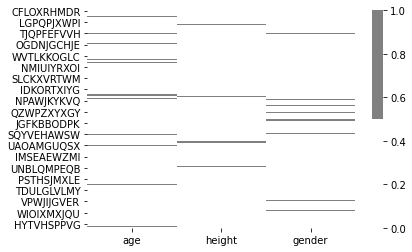

In [25]:
colours = ['#FFFFFF', '#808080'] # specify the colours - gray is missing. white is not missing.
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours))

An alternative to the heatmap when we have many features is the **missing data histogram**. The code is a bit more complex but it allows you to only plot variables with missing data (which we could have done previously as well!).

created missing indicator for: age
created missing indicator for: height
created missing indicator for: gender


<AxesSubplot:xlabel='index'>

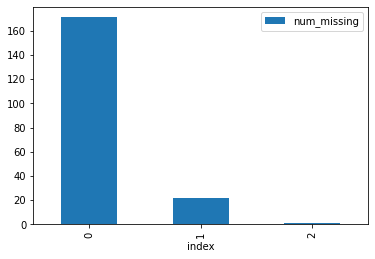

In [26]:
# first create missing indicator for features with missing data
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        data['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in data.columns if 'ismissing' in col]
data['num_missing'] = data[ismissing_cols].sum(axis=1)

data['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [27]:
data = data.drop(columns="num_missing") # Removing the column with the missing data indicator

### 3.2 Handling missing values

There are several ways to deal with missing values, let's see some of them.

#### Dropping missing values

The simplest way to handle missing values is to simply discard the rows with missing values.

We can do this using method [`dropna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). This method drops all the rows with any missing values from a DataFrame.

In [28]:
print(f"Shape before dropping missing values: {data.shape}")
data_no_missing_values = data.dropna()
print(f"Shape after dropping missing values: {data_no_missing_values.shape}")

Shape before dropping missing values: (194, 6)
Shape after dropping missing values: (171, 6)


#### Replacing with the mean or median

An alternative to dropping the rows that contain a missing value is to impute that value with another one. For **numerical variables** with missing values, the simplest imputation we can perform is to replace them with the **mean or median of that variable**. It's practically the same to chose the mean or the median, but the *median is less sensible to outliers in your variable*.

For this, we can use method [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html), together with value that we think is the best to replace it. The most used are [`mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) or [`median()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html).

In our case, let's replace missing values in the `age` column, with the *median*.

In [29]:
print(f"Missing values in the age column before: {data.age.isnull().sum()}")
age_without_missing_values = data.age.fillna(data.age.median())
print(f"Missing values in the age column after: {age_without_missing_values.isnull().sum()}")

Missing values in the age column before: 11
Missing values in the age column after: 0


#### Replacing with a new category


For **categorical variables**, we can replace missing values with *a new category*, called `unknown`, for instance.

This makes it clearer that there is missing information and we don't allow Pandas to trick us with **its default of ignoring missing values** :)

Let's see how we can replace missing values in the `gender` column. We can use method [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) again.

In [30]:
print(f"Missing values in the gender column before: {data.gender.isnull().sum()}")
gender_without_missing_values = data.gender.fillna('unknown')
print(f"Missing values in the age column after: {gender_without_missing_values.isnull().sum()}")

Missing values in the gender column before: 9
Missing values in the age column after: 0


In [31]:
gender_without_missing_values.value_counts()

female     111
male        74
unknown      9
Name: gender, dtype: int64

#### Pro tip

The [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) can receive a dictionary and handle all these replacements at the same time!

In [32]:
data = data.fillna({
    'age': data.age.median(),
    'height': data.height.median(),
    'gender': 'unknown'
})

print(f"Number of rows with missing values: {data.isnull().any(axis=1).sum()}")

Number of rows with missing values: 0


#### Last important note

The ways we saw on **how to impute missing data** are the mechanical ways to handle missing data (_Kaggle style_).
However, you can act in a smarter way: *understand the real nature of the missing value and act individually; understand why it is missing, and whether it should be missing, or not*.

For example, if you have missing values in a `height` feature, it might make more sense to replace the missing values according to the `gender` of each observation instead of replacing all missing values by the median of the entire population.

Give it a try and see if the results make more sense! ;)

---

## Tidy Data

Now we're finally ready to embrace the concept of **tidy data**. We've learned how to clean our messy datasets, **but that doesn't make them tidy**. 

Tidy datasets are easy to manipulate, model and visualize, and have a **specific structure**:
* each **variable** is a *column*
* each **observation** is a *row*
* each **cell** is a *single measurement*
* each **type of observational unit** is a *table*

![tidy](https://r4ds.had.co.nz/images/tidy-1.png)

It's easier to explain the principle of Tidy Data by running through examples where this principle is violated, and seeing that following the structure described above yields a much cleaner dataset.

**The most common problems with messy datasets are the following:**

1) Column headers are values, not variable names;   
2) Multiple variables are stored in one column;   
3) Variables are stored in both rows and columns;   
4) Multiple types of observational units are stored in the same table;   
5) A single observational unit is stored in multiple tables;   


In this notebook we will cover the problems **number 1) and 4)**. If you want, you can check the other ones [here](https://vita.had.co.nz/papers/tidy-data.pdf).

#### Problem: Column headers are values, not variable names

In [33]:
df_messy = pd.read_csv(os.path.join('data', 'column_headers_are_values.csv'), sep=' ')
df_messy

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Don’t know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovah’s Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


In the above dataset, we have two variables: `religion` and `income`.
The Tidy Data principle is not being followed because **the `income` variable is represented as multiple columns, instead of just one column**.

> Using this data representation, it becomes kind of complicated to answer questions like "*How many people with the Buddhist religion earn between \\$10k and \\$40k?*".

In [34]:
# How many people with the Buddhist religion earn between $10k and $40k? - with messy data
df_messy[df_messy.religion == 'Buddhist'][['$10-20k', '$20-30k', '$30-40k']].sum(axis=1).values[0]

85

The above query is a very unnatural one: **first** we're subsetting rows to get the right religion, **then** we subset columns to get the right income values, **finally** we do a messy sum to get the counts.

We can **tidy up this data** using method [`melt()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html)

In [35]:
# Getting the income values from the column names, except 'religion'
income_values = list(filter(lambda x: x != 'religion', df_messy.columns.tolist()))
print(f"Income values stored in the columns:\n{income_values}")

# Using the melt function to 'melt' the income_values into a column
df_tidy = pd.melt(df_messy, id_vars=['religion'], value_vars=income_values, var_name='income', value_name='freq')
df_tidy.head(10) #showing to top 10 observations

Income values stored in the columns:
['<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k', '$50-75k']


,religion,income,freq
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovah’s Witness,<$10k,20
9,Jewish,<$10k,19


> As you can see, the column names, with exception of religion, are now the unique values of column `income`. We also have a new column named `freq`. On column `freq` it is represented the value that is on the same row and column of the correspondent `religion` and `income`, respectively, on DataFrame `df_messy`.

Now obtaining the answer to the same question is much easier:

In [36]:
# How many people with the Buddhist religion earn between $10k and $40k? - with tidy data
df_tidy[(df_tidy.religion == 'Buddhist') & (df_tidy.income.isin(['$10-20k', '$20-30k', '$30-40k']))].freq.sum()

85

The query becomes much easier to understand: **first** we subset the rows with the desired value for religion **AND** income, **then** we just sum the frequencies to get the final value.

#### Problem: Multiple types of observational units are stored in the same table

Let's get another messy dataset: 

In [37]:
df_messy = pd.read_csv(os.path.join('data', 'multiple_types.csv'))
df_messy

,year,artist,track,time,date.entered,wk1,wk2,wk3
0,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,87,82,72
1,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,91,87,92
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70,68
3,2000,A*Teens,Dancing Queen,3:44,2000-07-08,97,97,96
4,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,84,62,51
5,2000,Aaliyah,Try Again,4:03,2000-03-18,59,53,38
6,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26,76,76,74
7,2000,"Aguilera, Christina",I Turn To You,4:00,2000-04-15,50,39,30


In this dataset, we have data from a music billboard: **each observation is a song in the billboard, and the columns have information about the following variables**:
* `year` the billboard reports to
* `artist`
* `track` name
* `time`, which is the track duration 
* `date.entered`, which is the date when the song entered the billboard
* `wk1`, `wk2` and `wk3`: position of the song in the billboard per week of the year

Now, the first problem that we can see is that **the `wk1`, `wk2` and `wk3` all refer to the same variable, which is the position of the song in the billboard per week of the year**. We can take care of these like we did in the previous example. 

[`melt()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) method to the rescue! 

In [38]:
id_vars = ['year', 'artist', 'track', 'time', 'date.entered']
value_vars = ['wk1', 'wk2', 'wk3']
df_melted = pd.melt(df_messy, id_vars=id_vars, value_vars=value_vars, var_name='week', value_name='position')
df_melted.sort_values(['artist', 'week']).head(10)

,year,artist,track,time,date.entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,wk1,87
8,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,wk2,82
16,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,wk3,72
1,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,wk1,91
9,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,wk2,87
17,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,wk3,92
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81
10,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk2,70
18,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk3,68
3,2000,A*Teens,Dancing Queen,3:44,2000-07-08,wk1,97


*We've created another problem...* 

We're trying to represent **two observational units in the same table**: one is the song itself, the other is its billboard position in a certain point in time.

**It is better to split these two types of observational units into two tables** (and obey to the last "rule" of the tidy data). However, we should have **a way to relate both**. We need to maintain a correspondence, a *mapping id*, for these two tables if, in future, we need to put the pieces together.

As the main table doesn't have any unique id, we need to create one. 

In [39]:
# In one table we store the songs, and give it an id
df_messy['song_id'] = range(len(df_messy))
df_songs = df_messy[['song_id'] + id_vars]
df_songs

,song_id,year,artist,track,time,date.entered
0,0,2000,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26
1,1,2000,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02
2,2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08
3,3,2000,A*Teens,Dancing Queen,3:44,2000-07-08
4,4,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29
5,5,2000,Aaliyah,Try Again,4:03,2000-03-18
6,6,2000,"Adams, Yolanda",Open My Heart,5:30,2000-08-26
7,7,2000,"Aguilera, Christina",I Turn To You,4:00,2000-04-15


In [40]:
# In the other table, we keep the positions per week and the song_id
df_positions = pd.melt(df_messy, id_vars=['song_id'], value_vars=value_vars, var_name='week', value_name='position')
df_positions = df_positions.sort_values(['song_id', 'week']).reset_index(drop=True)
df_positions.head()

,song_id,week,position
0,0,wk1,87
1,0,wk2,82
2,0,wk3,72
3,1,wk1,91
4,1,wk2,87


Look at that! Two beautiful **tidy** datasets!

---

That was a lot of cleaning and tidying up! Now it's time for you to get your hands dirty in the **Exercise Notebook**!

*Good luck!*

![cleaning](https://i.pinimg.com/originals/c1/83/21/c183216cce9e57bc2068dd4e2a66ca5d.gif)